# Phase 1 Project: Movie Analysis

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they dont know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Importing relevant packages and loading in the data

In [97]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [60]:
ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [61]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


**Merging all the dataframes**

In [9]:
df_ratings = df.merge(ratings, on = "tconst", how = "inner")
df_ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [10]:
all3 = df_ratings.merge(movie_gross, left_on = 'primary_title', right_on = 'title', how = 'inner')
all3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


In [11]:
all3.shape

(3027, 13)

In [12]:
# to be lazy, we're dropping missing values from genres
all3.dropna(subset=['genres'], inplace=True)
all3['genres'].isna().sum()

0

In [13]:
all3['genres'] = all3['genres'].apply(lambda x: x.split(','))
all3['genres']

0            [Action, Crime, Drama]
1       [Adventure, Drama, Romance]
2                           [Drama]
3                           [Drama]
4        [Adventure, Comedy, Drama]
                   ...             
3022                        [Drama]
3023                      [Romance]
3024                        [Drama]
3025               [Drama, Romance]
3026           [Documentary, Music]
Name: genres, Length: 3020, dtype: object

In [14]:
all3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"[Action, Crime, Drama]",7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",6.1,37886,On the Road,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,[Drama],6.0,6,On the Road,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,[Drama],5.7,127,On the Road,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013


In [64]:
all3['genres'][0]

['Action', 'Crime', 'Drama']

In [82]:
exploded_genres = all3.explode('genres')
exploded_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000,2012
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000,2012


In [128]:
exploded_genres['studio'].value_counts()

Uni.        386
Fox         339
IFC         317
WB          308
Magn.       264
           ... 
CAVU          1
EpicPics      1
CF&SR         1
3D            1
SEG           1
Name: studio, Length: 216, dtype: int64

In [147]:
exploded_genres.loc[exploded_genres['studio'] == 'Uni.', 'Uni_dummy'] = 1
exploded_genres.loc[exploded_genres['Uni_dummy'].isna(), 'Uni_dummy'] = 0
exploded_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,new_column_name,WB_dummy,Uni_dummy
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,0.0,0.0,0.0
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,0.0,0.0,0.0
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,0.0,0.0,0.0
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000,2012,0.0,0.0,0.0
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000,2012,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018,0.0,0.0,0.0
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Drama,6.4,322,Last Letter,CL,181000.0,NaN,2018,0.0,0.0,0.0
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Romance,6.4,322,Last Letter,CL,181000.0,NaN,2018,0.0,0.0,0.0
3026,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018,0.0,0.0,0.0


In [148]:
exploded_genres['Uni_dummy'].value_counts()

0.0    6592
1.0     386
Name: Uni_dummy, dtype: int64

In [142]:
exploded_genres.loc[exploded_genres['studio'] == 'WB', 'WB_dummy'] = 1
exploded_genres.loc[exploded_genres['WB_dummy'].isna(), 'WB_dummy'] = 0
exploded_genres

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,new_column_name,WB_dummy
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,0.0,0.0
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,0.0,0.0
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,0.0,0.0
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000,2012,0.0,0.0
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000,2012,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Helicopter Eela,Eros,72000.0,NaN,2018,0.0,0.0
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Drama,6.4,322,Last Letter,CL,181000.0,NaN,2018,0.0,0.0
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,Romance,6.4,322,Last Letter,CL,181000.0,NaN,2018,0.0,0.0
3026,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,Documentary,8.8,2067,Burn the Stage: The Movie,Trafalgar,4200000.0,16100000,2018,0.0,0.0


In [143]:
exploded_genres['WB_dummy'].value_counts()

0.0    6670
1.0     308
Name: WB_dummy, dtype: int64

In [131]:
exploded_genres.groupby('genres')['studio'].describe().reset_index()

,genres,count,unique,top,freq
0,Action,646,92,Uni.,54
1,Adventure,439,80,BV,57
2,Animation,152,36,BV,25
3,Biography,285,81,SPC,26
4,Comedy,925,118,Uni.,62
5,Crime,382,96,IFC,22
6,Documentary,226,86,Magn.,18
7,Drama,1755,174,IFC,111
8,Family,117,46,BV,19
9,Fantasy,170,59,Uni.,16


In [17]:
exploded_genres.groupby('genres').mean()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
genres,,,,,,
Action,2013.953560,115.502347,6.275232,121994.900929,5.945351e+07,2014.102167
Adventure,2014.148064,110.446469,6.478360,157429.473804,9.542850e+07,2014.307517
Animation,2014.131579,96.125828,6.700000,85582.750000,8.854119e+07,2014.493421
Biography,2014.414035,112.263158,6.973333,60004.003509,2.052287e+07,2014.722807
Comedy,2013.592873,105.194777,6.247624,58746.550756,3.418566e+07,2013.822894
Crime,2013.675393,111.315789,6.479581,74822.107330,2.464449e+07,2013.979058
Documentary,2013.555066,89.278027,7.292511,5504.259912,1.300178e+07,2013.916300
Drama,2013.761390,110.227220,6.589351,47360.224374,1.644713e+07,2014.150342
Family,2013.153846,101.622807,6.224786,49260.196581,4.745312e+07,2013.393162


In [21]:
exploded_genres.groupby('genres')['averagerating'].describe() #looking at the distribution of average rating for each genre

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,646.0,6.275232,0.985353,1.7,5.700,6.40,6.900,8.8
Adventure,439.0,6.478360,0.952579,3.2,5.900,6.50,7.200,9.2
Animation,152.0,6.700000,1.006338,3.2,6.100,6.85,7.325,8.4
Biography,285.0,6.973333,0.680093,4.8,6.600,7.00,7.400,8.6
Comedy,926.0,6.247624,1.015017,1.6,5.700,6.30,6.900,8.9
Crime,382.0,6.479581,0.892107,2.6,6.000,6.50,7.100,8.5
Documentary,227.0,7.292511,0.788965,1.6,6.900,7.30,7.700,9.2
Drama,1756.0,6.589351,0.906554,1.6,6.200,6.70,7.200,9.1
Family,117.0,6.224786,1.135623,2.6,5.600,6.40,7.000,8.3


In [22]:
exploded_genres.groupby('genres')['foreign_gross'].describe() #looking at the distribution for foreign gross revenue
#foreign gross does not seem to be read in as numeric--need to convert

,count,unique,top,freq
genres,,,,
Action,470,417,2500000,5
Adventure,370,345,216400000,3
Animation,124,121,1900000,2
Biography,160,141,1200000,5
Comedy,607,467,1200000,6
Crime,247,219,3600000,4
Documentary,89,81,2000000,2
Drama,962,573,7700000,11
Family,87,85,119100000,2


In [23]:
exploded_genres.dtypes #checking the data types for each column

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
title               object
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

In [24]:
exploded_genres['new_foreign_gross'] = exploded_genres['foreign_gross'].str.replace(",", "") #removing the commas
exploded_genres['FOREIGN_GROSS'] = exploded_genres['new_foreign_gross'].astype(float) #converting to a float
exploded_genres.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,new_foreign_gross,FOREIGN_GROSS
0,tt0315642,Wazir,Wazir,2016,103.0,Action,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN,NaN
0,tt0315642,Wazir,Wazir,2016,103.0,Crime,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN,NaN
0,tt0315642,Wazir,Wazir,2016,103.0,Drama,7.1,15378,Wazir,Relbig.,1100000.0,NaN,2016,NaN,NaN
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,On the Road,IFC,744000.0,8000000,2012,8000000,8000000.0
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,On the Road,IFC,744000.0,8000000,2012,8000000,8000000.0


In [25]:
sorted_all3 = exploded_genres.groupby('genres')['FOREIGN_GROSS'].describe().sort_values(by = 'mean', ascending = False)
sorted_all3.head(10)
#working correctly now

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Adventure,370.0,2.102409e+08,2.154927e+08,1019.4,37200000.0,131549999.5,338725000.0,946400000.0
Sci-Fi,114.0,2.076587e+08,2.257018e+08,1019.4,13250000.0,144750000.0,330400000.0,946400000.0
Animation,124.0,2.050703e+08,2.074195e+08,318000.0,43450000.0,128650000.0,341875000.0,875700000.0
Action,470.0,1.453669e+08,1.841130e+08,1010.0,17600000.0,67600000.0,209825000.0,946400000.0
Fantasy,130.0,1.418773e+08,2.024588e+08,68700.0,8550000.0,52250000.0,174650000.0,875700000.0
Family,87.0,9.524706e+07,1.347393e+08,60300.0,10350000.0,42500000.0,129600000.0,718100000.0
Comedy,607.0,7.511500e+07,1.283320e+08,4500.0,5150000.0,23400000.0,82250000.0,875700000.0
Musical,10.0,7.411853e+07,1.052313e+08,24300.0,6200000.0,23950000.0,76350000.0,274400000.0
Thriller,298.0,7.253800e+07,1.270689e+08,1010.0,6225000.0,22400000.0,82400000.0,867600000.0


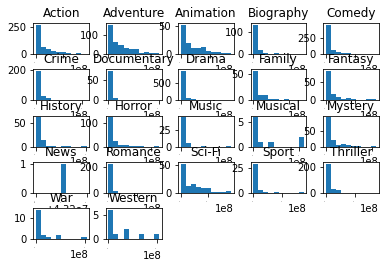

In [62]:
exploded_genres['FOREIGN_GROSS'].hist(xlabelsize = 0.1, by=exploded_genres['genres']);

**Checking domestic gross**

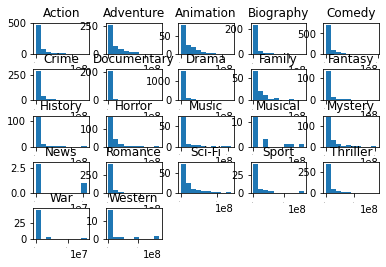

In [27]:
exploded_genres['domestic_gross'].hist(xlabelsize = 0.1, by=exploded_genres['genres']);

In [28]:
sorted_all3 = exploded_genres.groupby('genres')['domestic_gross'].describe().sort_values(by = 'mean', ascending = False)
sorted_all3.head(10)

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Sci-Fi,134.0,1.115925e+08,1.494232e+08,3000.0,5725000.0,51150000.0,146150000.0,700100000.0
Adventure,437.0,9.542850e+07,1.240286e+08,1000.0,3800000.0,47400000.0,133100000.0,700100000.0
Animation,151.0,8.854119e+07,1.126443e+08,600.0,837500.0,46500000.0,143550000.0,608600000.0
Action,640.0,5.945351e+07,1.030226e+08,100.0,450750.0,15900000.0,71250000.0,700100000.0
Fantasy,169.0,5.375420e+07,9.498057e+07,1400.0,280000.0,16000000.0,56300000.0,620200000.0
Family,116.0,4.745312e+07,6.697880e+07,1000.0,544750.0,23750000.0,67300000.0,356500000.0
Sport,53.0,3.991252e+07,8.247052e+07,1700.0,850000.0,7200000.0,36500000.0,412600000.0
Comedy,923.0,3.418566e+07,6.324829e+07,800.0,243000.0,3800000.0,43850000.0,486300000.0
Musical,18.0,3.058807e+07,5.369084e+07,14900.0,106250.0,1327500.0,38450000.0,174300000.0


In [65]:
averagerating_df = exploded_genres.groupby('genres')['averagerating'].describe().sort_values(by = 'mean', ascending = False)
averagerating_df.head(10) #finding the average rating for the top 10 movie genres

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Documentary,227.0,7.292511,0.788965,1.6,6.900,7.30,7.700,9.2
News,4.0,7.100000,0.836660,6.4,6.625,6.85,7.325,8.3
Biography,285.0,6.973333,0.680093,4.8,6.600,7.00,7.400,8.6
History,136.0,6.878676,0.839260,2.5,6.400,7.00,7.400,8.7
Sport,53.0,6.867925,0.969888,2.9,6.400,7.00,7.400,8.6
War,51.0,6.801961,0.969018,4.1,6.450,7.10,7.400,8.7
Music,92.0,6.756522,1.078593,1.6,6.200,6.80,7.500,8.8
Animation,152.0,6.700000,1.006338,3.2,6.100,6.85,7.325,8.4
Drama,1756.0,6.589351,0.906554,1.6,6.200,6.70,7.200,9.1


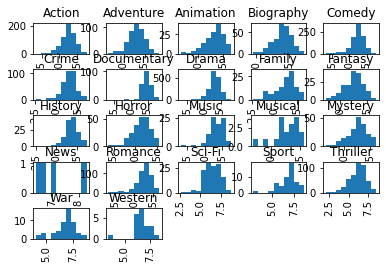

In [30]:
exploded_genres['averagerating'].hist(by=exploded_genres['genres']);

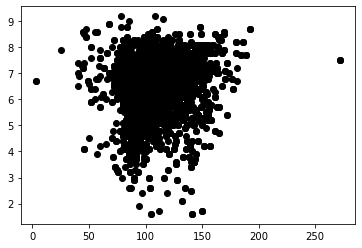

In [31]:
#seeing if run time has anything to do with rating, domestic and foreign gross
plt.plot(exploded_genres['runtime_minutes'],exploded_genres['averagerating'], 'o', color='black');
#average rating

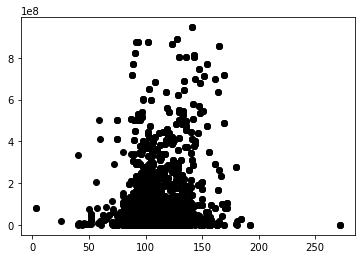

In [32]:
plt.plot(exploded_genres['runtime_minutes'],exploded_genres['FOREIGN_GROSS'], 'o', color='black');
#foreign gross

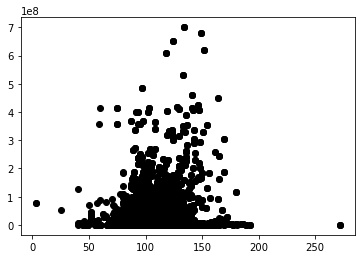

In [34]:
plt.plot(exploded_genres['runtime_minutes'],exploded_genres['domestic_gross'], 'o', color='black');
#domestic gross

**Run time does not appear to correlate with average rating, domestic, or foreign gross**

In [35]:
exploded_genres[['averagerating','runtime_minutes']].corr()

,averagerating,runtime_minutes
averagerating,1.000000,0.174594
runtime_minutes,0.174594,1.000000


In [36]:
exploded_genres[['runtime_minutes','FOREIGN_GROSS']].corr()

,runtime_minutes,FOREIGN_GROSS
runtime_minutes,1.000000,0.211879
FOREIGN_GROSS,0.211879,1.000000


In [37]:
exploded_genres[['runtime_minutes', 'domestic_gross']].corr()

,runtime_minutes,domestic_gross
runtime_minutes,1.0000,0.1496
domestic_gross,0.1496,1.0000


In [38]:
medianrating_df = exploded_genres.groupby('genres')['averagerating'].describe().sort_values(by = '50%', ascending = False).reset_index()
medianrating_df1 = medianrating_df.head(10)

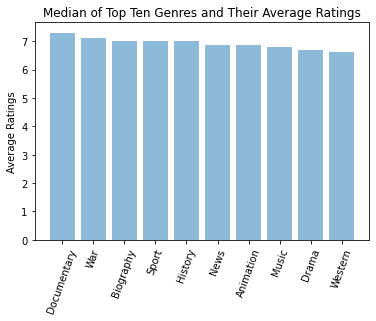

In [39]:
plt.bar(medianrating_df1['genres'], medianrating_df1['50%'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Median of Top Ten Genres and Their Average Ratings')
plt.ylabel('Average Ratings')
plt.show()

In [40]:
mediandomestic_df = exploded_genres.groupby('genres')['domestic_gross'].describe().sort_values(by = '50%', ascending = False).reset_index()
mediandomestic_df1 = mediandomestic_df.head(10)

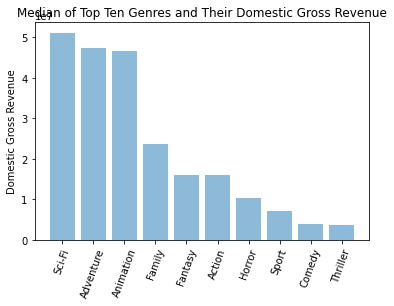

In [41]:
plt.bar(mediandomestic_df1['genres'], mediandomestic_df1['50%'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Median of Top Ten Genres and Their Domestic Gross Revenue')
plt.ylabel('Domestic Gross Revenue')
plt.show()

In [42]:
medianforeign_df = exploded_genres.groupby('genres')['FOREIGN_GROSS'].describe().sort_values(by = '50%', ascending = False).reset_index()
medianforeign_df1 = medianforeign_df.head(10)

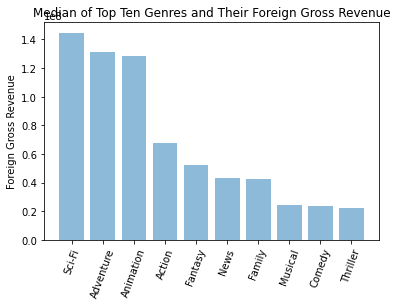

In [43]:
plt.bar(medianforeign_df1['genres'], medianforeign_df1['50%'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Median of Top Ten Genres and Their Foreign Gross Revenue')
plt.ylabel('Foreign Gross Revenue')
plt.show()

**Accounting for Number of Votes**

In [44]:
exploded_genres['numvotes'].describe()

count    6.978000e+03
mean     7.213467e+04
std      1.349915e+05
min      5.000000e+00
25%      3.797000e+03
50%      1.900200e+04
75%      7.822600e+04
max      1.841066e+06
Name: numvotes, dtype: float64

In [45]:
all3_filter = exploded_genres[exploded_genres['numvotes']>=1000]
all3_filter['numvotes'].describe()

count    6.015000e+03
mean     8.363616e+04
std      1.420630e+05
min      1.004000e+03
25%      8.016000e+03
50%      2.970300e+04
75%      9.209600e+04
max      1.841066e+06
Name: numvotes, dtype: float64

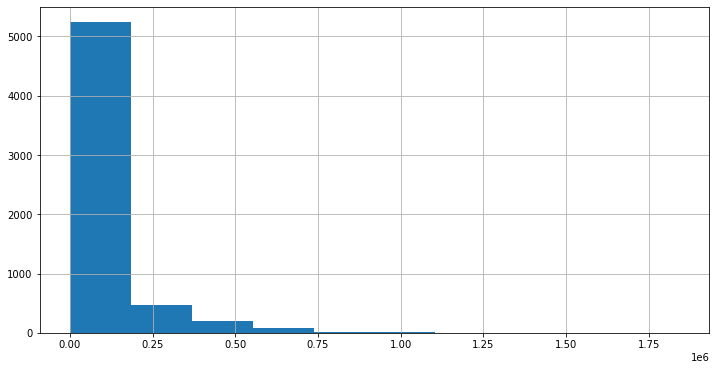

In [46]:
fig, ax = plt.subplots(figsize = (12,6))
all3_filter['numvotes'].hist(ax=ax);


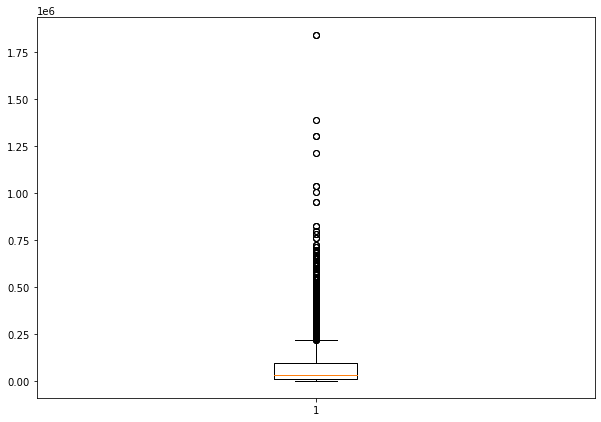

In [47]:
fig = plt.figure(figsize =(10, 7))
 

plt.boxplot(all3_filter['numvotes'])
 

plt.show()

**Does the number of votes correlate with any of the 3 variables?**

In [48]:
exploded_genres[['numvotes', 'domestic_gross']].corr()

,numvotes,domestic_gross
numvotes,1.000000,0.679974
domestic_gross,0.679974,1.000000


In [49]:
exploded_genres[['numvotes', 'FOREIGN_GROSS']].corr()

,numvotes,FOREIGN_GROSS
numvotes,1.000000,0.564015
FOREIGN_GROSS,0.564015,1.000000


In [50]:
exploded_genres[['averagerating', 'numvotes']].corr()

,averagerating,numvotes
averagerating,1.00000,0.31788
numvotes,0.31788,1.00000


In [ ]:
#No correlation between the average rating and number of votes

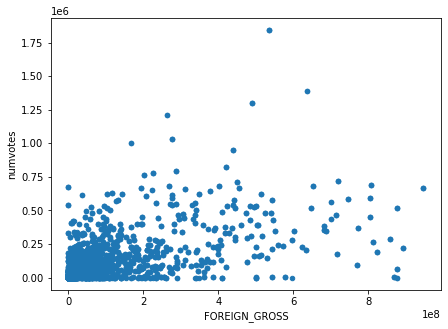

In [51]:
exploded_genres.plot.scatter(x='FOREIGN_GROSS', y = 'numvotes', marker = 'o', figsize = (7,5));

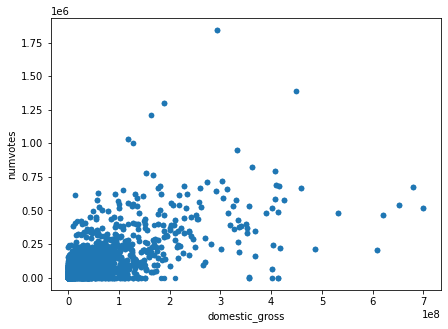

In [52]:
exploded_genres.plot.scatter(x='domestic_gross', y = 'numvotes', marker = 'o', figsize = (7,5));

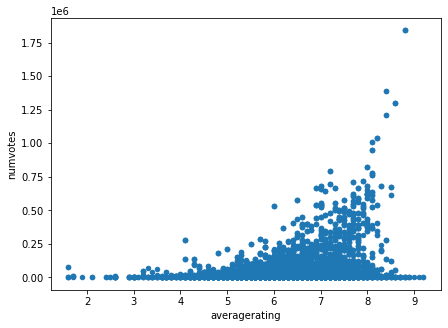

In [53]:
exploded_genres.plot.scatter(x='averagerating', y = 'numvotes', marker = 'o', figsize = (7,5));

In [54]:
sorted_all3 = exploded_genres.groupby('genres')['FOREIGN_GROSS'].describe().sort_values(by = 'mean', ascending = True).reset_index()
bottom_ten_fg = sorted_all3.head(10)

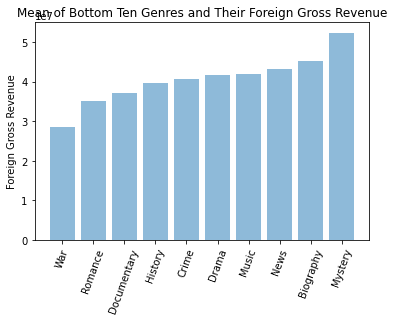

In [55]:
plt.bar(bottom_ten_fg['genres'], bottom_ten_fg['mean'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Mean of Bottom Ten Genres and Their Foreign Gross Revenue')
plt.ylabel('Foreign Gross Revenue')
plt.show()

In [56]:
sorted_all3 = exploded_genres.groupby('genres')['domestic_gross'].describe().sort_values(by = 'mean', ascending = True).reset_index()
bottom_ten_dg = sorted_all3.head(10)

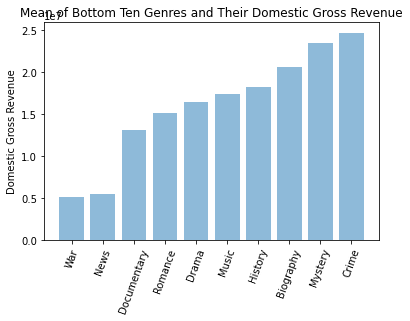

In [57]:
plt.bar(bottom_ten_dg['genres'], bottom_ten_dg['mean'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Mean of Bottom Ten Genres and Their Domestic Gross Revenue')
plt.ylabel('Domestic Gross Revenue')
plt.show()

In [58]:
sorted_all3 = exploded_genres.groupby('genres')['averagerating'].describe().sort_values(by = 'mean', ascending = True).reset_index()
bottom_ten_ar = sorted_all3.head(10)

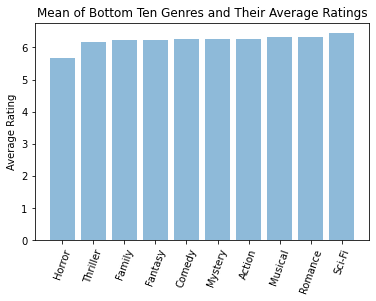

In [59]:
plt.bar(bottom_ten_ar['genres'], bottom_ten_ar['mean'], align='center', alpha=0.5)
plt.xticks(rotation = 70)
plt.title('Mean of Bottom Ten Genres and Their Average Ratings')
plt.ylabel('Average Rating')
plt.show()

In [74]:
crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip', header=0,    sep=',', error_bad_lines=False)
crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [75]:
crew.dropna(subset=['directors','writers'], inplace=True)
crew[['directors','writers']].isna().sum()

directors    0
writers      0
dtype: int64

In [76]:
crew['directors'] = crew['directors'].apply(lambda x: x.split(','))
crew.head()

,tconst,directors,writers
0,tt0285252,[nm0899854],nm0899854
2,tt0462036,[nm1940585],nm1940585
3,tt0835418,[nm0151540],"nm0310087,nm0841532"
4,tt0878654,"[nm0089502, nm2291498, nm2292011]",nm0284943
6,tt0996958,[nm2286991],"nm2286991,nm2651190"


In [77]:
crew['writers'] = crew['writers'].apply(lambda x: x.split(','))
crew.head()

,tconst,directors,writers
0,tt0285252,[nm0899854],[nm0899854]
2,tt0462036,[nm1940585],[nm1940585]
3,tt0835418,[nm0151540],"[nm0310087, nm0841532]"
4,tt0878654,"[nm0089502, nm2291498, nm2292011]",[nm0284943]
6,tt0996958,[nm2286991],"[nm2286991, nm2651190]"


In [79]:
exploded_genres1 = crew.explode('directors')
exploded_genres1.head()

,tconst,directors,writers
0,tt0285252,nm0899854,[nm0899854]
2,tt0462036,nm1940585,[nm1940585]
3,tt0835418,nm0151540,"[nm0310087, nm0841532]"
4,tt0878654,nm0089502,[nm0284943]
4,tt0878654,nm2291498,[nm0284943]


In [81]:
exploded_genres1 = exploded_genres1.explode('writers')
exploded_genres1.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,nm0310087
3,tt0835418,nm0151540,nm0841532
4,tt0878654,nm0089502,nm0284943


In [86]:
all3exploded = exploded_genres1.merge(exploded_genres, on = 'tconst', how = 'inner')
all3exploded.head()

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year
0,tt0835418,nm0151540,nm0310087,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,The Babymakers,MNE,7900.0,NaN,2012
1,tt0835418,nm0151540,nm0841532,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,The Babymakers,MNE,7900.0,NaN,2012
2,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Comedy,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010
3,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Drama,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010
4,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Romance,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010


In [89]:
all3exploded.groupby('primary_title')['directors'].value_counts()

primary_title           directors
'71                     nm1312919     3
1,000 Times Good Night  nm0691547     8
10 Cloverfield Lane     nm0870469     9
10 Years                nm1956691     3
1001 Grams              nm0357584     1
                                     ..
Zookeeper               nm0178997    15
Zoolander 2             nm0001774     5
Zootopia                nm0397174    24
                        nm0601781    24
                        nm1158544    24
Name: directors, Length: 3253, dtype: int64

In [90]:
all3exploded.groupby('primary_title')['directors'].value_counts()

primary_title           writers  
'71                     nm2954373    3
1,000 Times Good Night  nm0691547    2
                        nm0792202    2
                        nm0995943    2
                        nm4153140    2
                                    ..
Zootopia                nm1074879    9
                        nm1158544    9
                        nm1601644    9
                        nm1601882    9
                        nm2888684    9
Name: writers, Length: 6735, dtype: int64

In [104]:
all3exploded.groupby(['directors']).agg(['min', 'max', 'count', 'nunique'])

tconst                             writers                   \
                 min        max count nunique        min        max count   
directors                                                                   
nm0000095  tt1182350  tt5825380    15       7  nm0000095  nm0000095    15   
nm0000108  tt1802197  tt2872732    15       3  nm0000108  nm0617789    15   
nm0000110  tt0800369  tt1205537    33       2  nm0002007  nm3092414    33   
nm0000123  tt0491175  tt2177771    30       3  nm0000123  nm4007817    30   
nm0000127  tt0872230  tt1262416     5       2  nm0000127  nm0932078     5   
...              ...        ...   ...     ...        ...        ...   ...   
nm9648941  tt8045226  tt8045226     2       1  nm1151128  nm9648941     2   
nm9659009  tt6485776  tt6485776     2       1  nm2157655  nm2157655     2   
nm9829468  tt8396182  tt8396182     1       1  nm9829468  nm9829468     1   
nm9837588  tt8413566  tt8413566     6       1  nm5712224  nm8341271     6   
nm9985593  tt3398268  tt3398268    15       1  nm0027943  nm2226124    15   

                               primary_title  \
          nunique                        min   
directors                                      
nm0000095       1               Blue Jasmine   
nm0000108       4                       Lucy   
nm0000110      11  Jack Ryan: Shadow Recruit   
nm0000123       7                 Suburbicon   
nm0000127       2            My Soul to Take   
...           ...                        ...   
nm9648941       2                Archipelago   
nm9659009       1             Golden Slumber   
nm9829468       1                     Aurora   
nm9837588       3                 Disconnect   
nm9985593       5      When Marnie Was There   

                                                        ... studio          \
                                                   max  ...  count nunique   
directors                                               ...                  
nm0000095           You Will Meet a Tall Dark Stranger  ...     15       2   
nm0000108  Valerian and the City of a Thousand Planets  ...     15       3   
nm0000110                                         Thor  ...     33       1   
nm0000123                            The Monuments Men  ...     30       2   
nm0000127                                     Scream 4  ...      5       2   
...                                                ...  ...    ...     ...   
nm9648941                                  Archipelago  ...      2       1   
nm9659009                               Golden Slumber  ...      2       1   
nm9829468                                       Aurora  ...      1       1   
nm9837588                                   Disconnect  ...      6       1   
nm9985593                        When Marnie Was There  ...     15       1   

          domestic_gross                             year                      
                     min          max count nunique   min   max count nunique  
directors                                                                      
nm0000095      1400000.0   56800000.0    15       7  2010  2017    15       7  
nm0000108       355000.0  126700000.0    15       3  2012  2017    15       3  
nm0000110     50600000.0  181000000.0    33       2  2011  2014    33       2  
nm0000123      5800000.0   78000000.0    30       3  2011  2017    30       3  
nm0000127     14700000.0   38200000.0     5       2  2010  2011     5       2  
...                  ...          ...   ...     ...   ...   ...   ...     ...  
nm9648941         7800.0       7800.0     2       1  2014  2014     2       1  
nm9659009        94500.0      94500.0     2       1  2018  2018     2       1  
nm9829468         5700.0       5700.0     1       1  2011  2011     1       1  
nm9837588      1400000.0    1400000.0     6       1  2013  2013     6       1  
nm9985593       561000.0     561000.0    15       1  2015  2015    15       1  

[2386 rows x 52 columns]

In [102]:
all3exploded.nunique()

tconst             2899
directors          2386
writers            4941
primary_title      2531
original_title     2646
start_year           10
runtime_minutes     129
genres               22
averagerating        70
numvotes           2671
title              2531
studio              207
domestic_gross     1502
foreign_gross       999
year                  9
dtype: int64

In [111]:
sorted_all34 = all3exploded.groupby('primary_title')['directors'].describe().sort_values(by = 'count', ascending = False).reset_index()
sorted_all34.head(10)

,primary_title,count,unique,top,freq
0,"Rio, I Love You",540,12,nm1701024,45
1,Movie 43,260,13,nm1743387,20
2,V/H/S,220,10,nm2318753,22
3,Twelve,151,15,nm0873627,11
4,One Day,135,14,nm1402737,13
5,V/H/S/2,98,7,nm0354918,14
6,Moana,96,4,nm2320658,24
7,Heroine,74,8,nm4561025,10
8,Zootopia,72,3,nm0601781,24
9,Madagascar 3: Europe's Most Wanted,72,3,nm0569891,24


In [110]:
sorted_all345 = all3exploded.groupby('primary_title')['writers'].describe().sort_values(by = 'count', ascending = False).reset_index()
sorted_all345.head(10)

,primary_title,count,unique,top,freq
0,"Rio, I Love You",540,15,nm6771771,36
1,Movie 43,260,20,nm1158962,13
2,V/H/S,220,11,nm2318753,20
3,Twelve,151,14,nm0873627,13
4,One Day,135,22,nm6157264,9
5,V/H/S/2,98,7,nm3851113,14
6,Moana,96,8,nm0962596,12
7,Heroine,74,9,nm4561025,14
8,Zootopia,72,8,nm1601882,9
9,Madagascar 3: Europe's Most Wanted,72,8,nm2593444,9


In [123]:
new = all3exploded.merge(sorted_all345, on = 'primary_title', how = 'inner')
new.head()

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross,foreign_gross,year,count,unique,top,freq
0,tt0835418,nm0151540,nm0310087,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,The Babymakers,MNE,7900.0,NaN,2012,2,2,nm0841532,1
1,tt0835418,nm0151540,nm0841532,The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147,The Babymakers,MNE,7900.0,NaN,2012,2,2,nm0841532,1
2,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Comedy,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010,3,1,nm0112459,3
3,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Drama,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010,3,1,nm0112459,3
4,tt1126618,nm0585011,nm0112459,Morning Glory,Morning Glory,2010,107.0,Romance,6.5,67367,Morning Glory,Par.,31000000.0,29000000,2010,3,1,nm0112459,3


In [ ]:
#Recommendations: Avoid war and documentary movies
#Recommend: Sci-fi and adventure movies
#Recommend: 

In [126]:
medianforeign_df1

,genres,count,mean,std,min,25%,50%,75%,max
0,Sci-Fi,114.0,2.076587e+08,2.257018e+08,1019.4,13250000.0,144750000.0,330400000.0,946400000.0
1,Adventure,370.0,2.102409e+08,2.154927e+08,1019.4,37200000.0,131549999.5,338725000.0,946400000.0
2,Animation,124.0,2.050703e+08,2.074195e+08,318000.0,43450000.0,128650000.0,341875000.0,875700000.0
3,Action,470.0,1.453669e+08,1.841130e+08,1010.0,17600000.0,67600000.0,209825000.0,946400000.0
4,Fantasy,130.0,1.418773e+08,2.024588e+08,68700.0,8550000.0,52250000.0,174650000.0,875700000.0
5,News,1.0,4.320000e+07,NaN,43200000.0,43200000.0,43200000.0,43200000.0,43200000.0
6,Family,87.0,9.524706e+07,1.347393e+08,60300.0,10350000.0,42500000.0,129600000.0,718100000.0
7,Musical,10.0,7.411853e+07,1.052313e+08,24300.0,6200000.0,23950000.0,76350000.0,274400000.0
8,Comedy,607.0,7.511500e+07,1.283320e+08,4500.0,5150000.0,23400000.0,82250000.0,875700000.0
9,Thriller,298.0,7.253800e+07,1.270689e+08,1010.0,6225000.0,22400000.0,82400000.0,867600000.0
